<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.2_n20.csv',
 'data_add_delta_-3.2_n30.csv',
 'data_add_delta_-3.2_n60.csv',
 'data_add_delta_-3.2_n120.csv',
 'data_add_delta_-3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.557104,75.704118,47.534660,4.965381e-07,212.795883,212.795885,-2.217250e-06
1,0.0,1.0,68.905287,84.827665,58.415380,6.624357e-07,222.148334,222.148334,-2.231837e-07
2,0.0,2.0,57.563241,88.099554,69.731743,3.061719e-07,225.394538,225.394537,1.160940e-06
3,0.0,3.0,37.847550,23.854407,68.524212,-6.659274e-06,140.226162,140.226167,-5.693661e-06
4,0.0,4.0,56.591444,27.442809,32.620199,-9.253496e-06,126.654442,126.654454,-1.153776e-05
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,32.817203,48.394182,75.872713,-2.242775e-06,167.084097,167.084098,-1.084345e-06
119996,999.0,116.0,83.710786,35.788961,40.534934,3.201211e-06,170.034684,170.034681,3.378722e-06
119997,999.0,117.0,98.597401,63.932020,96.399678,-5.224606e-07,268.929098,268.929093,5.321658e-06
119998,999.0,118.0,84.794663,53.938114,54.162415,-3.741660e-06,202.895189,202.895191,-2.612076e-06


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.557104,75.704118,47.534660,4.965381e-07,212.795883,212.795885,-2.217250e-06
1,0.0,1.0,68.905287,84.827665,58.415380,6.624357e-07,222.148334,222.148334,-2.231837e-07
2,0.0,2.0,57.563241,88.099554,69.731743,3.061719e-07,225.394538,225.394537,1.160940e-06
3,0.0,3.0,37.847550,23.854407,68.524212,-6.659274e-06,140.226162,140.226167,-5.693661e-06
4,0.0,4.0,56.591444,27.442809,32.620199,-9.253496e-06,126.654442,126.654454,-1.153776e-05
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,32.817203,48.394182,75.872713,-2.242775e-06,167.084097,167.084098,-1.084345e-06
119996,999.0,116.0,83.710786,35.788961,40.534934,3.201211e-06,170.034684,170.034681,3.378722e-06
119997,999.0,117.0,98.597401,63.932020,96.399678,-5.224606e-07,268.929098,268.929093,5.321658e-06
119998,999.0,118.0,84.794663,53.938114,54.162415,-3.741660e-06,202.895189,202.895191,-2.612076e-06


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    79.557104  75.704118  ...  212.795885 -2.217250e-06
      1.0    68.905287  84.827665  ...  222.148334 -2.231837e-07
      2.0    57.563241  88.099554  ...  225.394537  1.160940e-06
      3.0    37.847550  23.854407  ...  140.226167 -5.693661e-06
      4.0    56.591444  27.442809  ...  126.654454 -1.153776e-05
...                ...        ...  ...         ...           ...
999.0 115.0  32.817203  48.394182  ...  167.084098 -1.084345e-06
      116.0  83.710786  35.788961  ...  170.034681  3.378722e-06
      117.0  98.597401  63.932020  ...  268.929093  5.321658e-06
      118.0  84.794663  53.938114  ...  202.895191 -2.612076e-06
      119.0  93.407212  69.648593  ...  253.364956 -1.295034e-06

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    79.557104  75.704118  ...  212.795885 -2.217250e-06
      1.0    68.905287  84.827665  ...  222.148334 -2.231837e-07
      2.0    57.563241  88.099554  ...  225.394537  1.160940e-06
      3.0    37.847550  23.854407  ...  140.226167 -5.693661e-06
      4.0    56.591444  27.442809  ...  126.654454 -1.153776e-05
...                ...        ...  ...         ...           ...
999.0 115.0  32.817203  48.394182  ...  167.084098 -1.084345e-06
      116.0  83.710786  35.788961  ...  170.034681  3.378722e-06
      117.0  98.597401  63.932020  ...  268.929093  5.321658e-06
      118.0  84.794663  53.938114  ...  202.895191 -2.612076e-06
      119.0  93.407212  69.648593  ...  253.364956 -1.295034e-06

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.557104,75.704118,47.534660,4.965381e-07,212.795883,212.795885,-2.217250e-06
1,0.0,1.0,68.905287,84.827665,58.415380,6.624357e-07,222.148334,222.148334,-2.231837e-07
2,0.0,2.0,57.563241,88.099554,69.731743,3.061719e-07,225.394538,225.394537,1.160940e-06
3,0.0,3.0,37.847550,23.854407,68.524212,-6.659274e-06,140.226162,140.226167,-5.693661e-06
4,0.0,4.0,56.591444,27.442809,32.620199,-9.253496e-06,126.654442,126.654454,-1.153776e-05
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,32.817203,48.394182,75.872713,-2.242775e-06,167.084097,167.084098,-1.084345e-06
119996,999.0,116.0,83.710786,35.788961,40.534934,3.201211e-06,170.034684,170.034681,3.378722e-06
119997,999.0,117.0,98.597401,63.932020,96.399678,-5.224606e-07,268.929098,268.929093,5.321658e-06
119998,999.0,118.0,84.794663,53.938114,54.162415,-3.741660e-06,202.895189,202.895191,-2.612076e-06


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    79.557104  75.704118  ...  212.795885 -2.217250e-06
      1.0    68.905287  84.827665  ...  222.148334 -2.231837e-07
      2.0    57.563241  88.099554  ...  225.394537  1.160940e-06
      3.0    37.847550  23.854407  ...  140.226167 -5.693661e-06
      4.0    56.591444  27.442809  ...  126.654454 -1.153776e-05
...                ...        ...  ...         ...           ...
999.0 115.0  32.817203  48.394182  ...  167.084098 -1.084345e-06
      116.0  83.710786  35.788961  ...  170.034681  3.378722e-06
      117.0  98.597401  63.932020  ...  268.929093  5.321658e-06
      118.0  84.794663  53.938114  ...  202.895191 -2.612076e-06
      119.0  93.407212  69.648593  ...  253.364956 -1.295034e-06

[120000 rows x 7 columns]

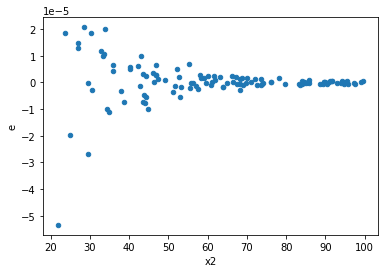

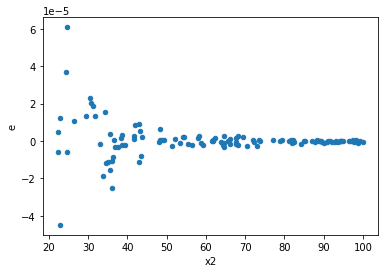

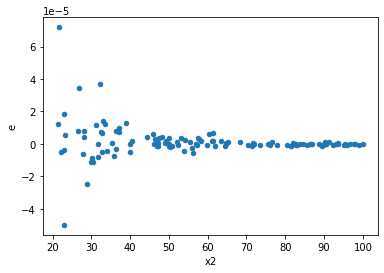

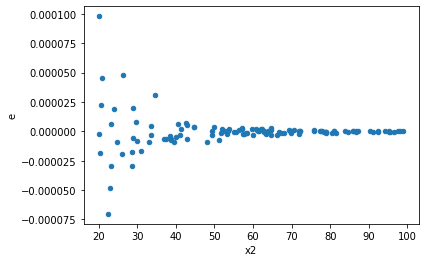

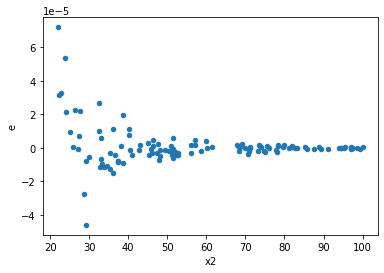

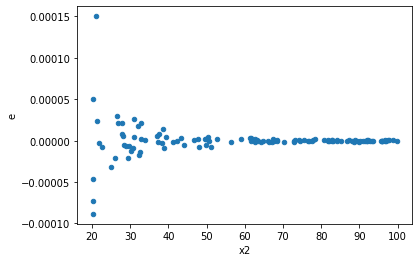

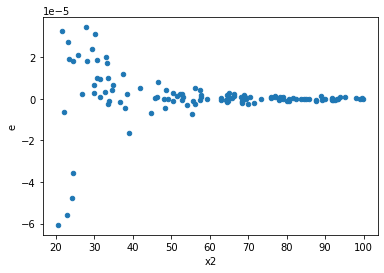

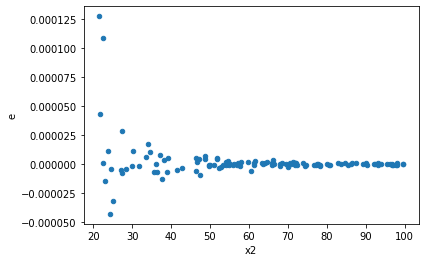

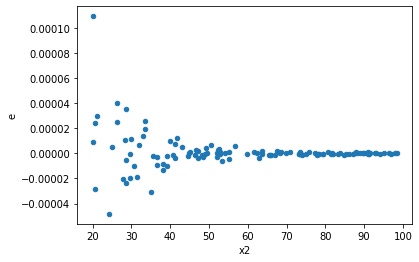

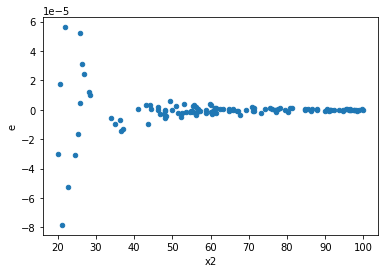

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,1.9347062176212868e-11,3.462914214647952e-08,4.3970595855029244e-13,7.870259578745346e-10,0.0005586930826751576,2.6315956237394143e-61,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,4.8607331919824296e-11,1.8336342594881095e-08,1.1047120890869158e-12,4.167350589745703e-10,0.0026508738952878133,3.944491519947184e-46,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,2.2156062049913716e-11,1.8436827888825238e-08,5.035468647707663e-13,4.1901881565511904e-10,0.0012017285285470798,7.806244089099621e-54,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,1.5806171728989047e-11,5.913651173772379e-09,3.59231175658842e-13,1.3440116304028135e-10,0.002672827879853814,4.744327496664325e-46,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,1.3477548225210659e-11,1.694091044757535e-08,3.0630791420933313e-13,3.8502069199034886e-10,0.000795562214139419,7.405583179695188e-58,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,2.1412934461837364e-11,3.074686051063634e-08,4.866576014053946e-13,6.987922843326441e-10,0.0006964266954809885,3.7234130818161833e-59,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,2.982328842650745e-11,1.1315443855448343e-08,6.778020096933511e-13,2.571691785329169e-10,0.0026356269190578544,3.4666502752189652e-46,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,2.4448039461528088e-11,2.192620909381897e-08,5.556372604892748e-13,4.983229339504311e-10,0.0011150144266580048,1.452881972355583e-54,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,2.604232646969301e-11,1.6728411504705986e-08,5.918710561293866e-13,3.8019117056149966e-10,0.001556772229232098,2.6015311225937096e-51,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64